In [1]:
from skimage import io, filters, color, measure, morphology, transform
import matplotlib.pyplot as plt
import numpy as np
import os
from helper import cosine_similarity, find_shapes, show_centroid

In [2]:
def similitudeMoments(image):
    if image.max() > 1:
        image = image / 255.0

    x, y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
    m00 = np.sum(image)
    m10 = np.sum(x * image)
    m01 = np.sum(y * image)
    xcentroid = m10 / m00
    ycentroid = m01 / m00
    # print(f'xcentroid is {xcentroid}, ycentroid is {ycentroid}')

    central_moments = [np.sum(((x - xcentroid)**p * (y - ycentroid)**q) * image) for p,q in [(0, 2), (0, 3), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0)]]
    
    Nvals = [central_moments[k] / (m00 ** ((i+j)/2 + 1)) for k, (i, j) in enumerate([(0, 2), (0, 3), (1, 1), (1, 2), (2, 0), (2, 1), (3, 0)])]

    return Nvals

In [3]:
# Calculate and store 7 similitude moments of template images to a dictionary
templates = {}
hu = {}
for file in os.listdir('digit_templates/'):
    filepath = os.path.join('digit_templates/', file)
    image = io.imread(filepath, as_gray=True)
    image = image < 0.5
    image = morphology.dilation(image, morphology.square(19))
    seven_moments = similitudeMoments(image)
    filename = file.split('.PNG')[0]
    templates[filename] = seven_moments

    moments = measure.moments_central(image)
    normalized_moments = measure.moments_normalized(moments)
    hu_moments = measure.moments_hu(normalized_moments) 
    hu[filename] = hu_moments

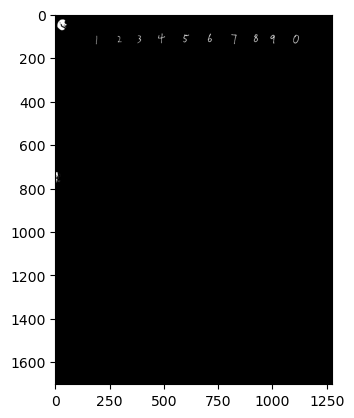

In [4]:
# Load the image and convert to binary
image = io.imread('image/test1.jpg')

gray_image = color.rgb2gray(image)

# gray_image = filters.gaussian(gray_image, sigma=1)

thresh = 0.2
binary_image = gray_image < thresh

plt.imshow(binary_image, cmap='gray')
plt.show()

key is 0_1, distance is 1.5329372815536457, min distance is inf
key is 0_2, distance is 1.5205735889448497, min distance is 1.5329372815536457
key is 0_3, distance is 1.548151830469652, min distance is 1.5205735889448497
key is 1_1, distance is 1.3799702435027434, min distance is 1.5205735889448497
key is 1_2, distance is 1.3851502365553985, min distance is 1.3799702435027434
key is 1_3, distance is 1.3954033888259736, min distance is 1.3799702435027434
key is 2_1, distance is 1.5339916361999666, min distance is 1.3799702435027434
key is 2_2, distance is 1.5045517125169758, min distance is 1.3799702435027434
key is 2_3, distance is 1.5357562197822754, min distance is 1.3799702435027434
key is 3_1, distance is 1.5035006543301332, min distance is 1.3799702435027434
key is 3_2, distance is 1.5176122610086324, min distance is 1.3799702435027434
key is 3_3, distance is 1.5232934620695742, min distance is 1.3799702435027434
key is 4_1, distance is 1.5295412270988793, min distance is 1.379970

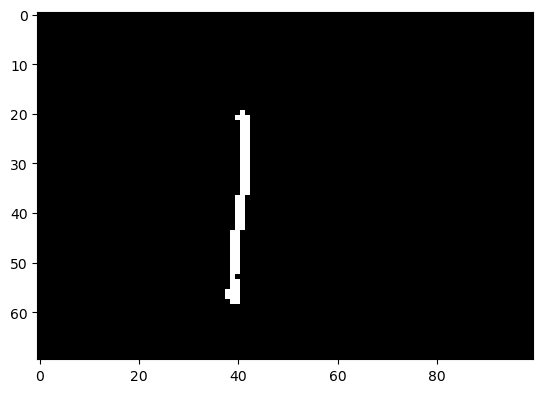

In [5]:
# Crop and test
test_image = binary_image[80:150 , 150:250]
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}, min distance is {min_distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

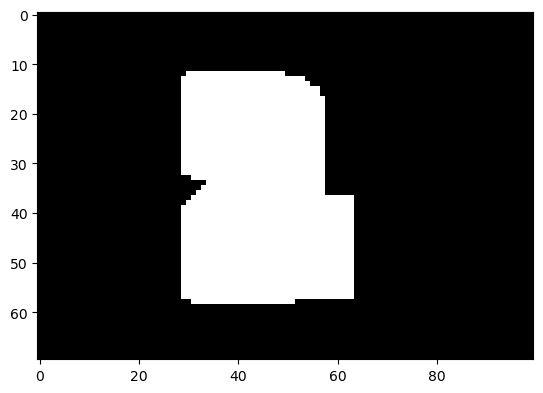

key is 0_1, distance is 0.027155707155806508
key is 0_2, distance is 0.03212978214160357
key is 0_3, distance is 0.039321636493645555
key is 1_1, distance is 0.1514832796810077
key is 1_2, distance is 0.14846659251036132
key is 1_3, distance is 0.13749005298289219
key is 2_1, distance is 0.025684540249028227
key is 2_2, distance is 0.023535287948547565
key is 2_3, distance is 0.018793301893862545
key is 3_1, distance is 0.042601876368742
key is 3_2, distance is 0.02557077279270922
key is 3_3, distance is 0.026494059020291786
key is 4_1, distance is 0.030984105181404317
key is 4_2, distance is 0.029462620483942582
key is 4_3, distance is 0.027648473971361946
key is 5_1, distance is 0.04759991572022568
key is 5_2, distance is 0.06261035885613957
key is 5_3, distance is 0.05525097422219261
key is 6_1, distance is 0.06008766621863545
key is 6_2, distance is 0.06947996387985643
key is 6_3, distance is 0.04816196768761089
key is 7_1, distance is 0.05959546063907341
key is 7_2, distance is 0.

In [6]:
# Crop and test
test_image = binary_image[80:150 , 250:350]
test_image = morphology.dilation(test_image, morphology.square(19))
plt.imshow(test_image, cmap='gray')
plt.show()

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)


best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    # distance = cosine_similarity(test_moments,moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)


# two = io.imread('templates/2.PNG', as_gray=True)
# two = two > 0.5
# four = io.imread('templates/4.PNG', as_gray=True)
# four = four > 0.5
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.imshow(two, cmap='gray')
# plt.subplot(1,2,2)
# plt.imshow(four, cmap='gray')

key is 0_1, distance is 0.06615455311620734
key is 0_2, distance is 0.054517933288544984
key is 0_3, distance is 0.08291146614340311
key is 1_1, distance is 0.09128351404624564
key is 1_2, distance is 0.08646712986226862
key is 1_3, distance is 0.07603775989035581
key is 2_1, distance is 0.07269829786693138
key is 2_2, distance is 0.04470591157483663
key is 2_3, distance is 0.0706549027229834
key is 3_1, distance is 0.04081514917023849
key is 3_2, distance is 0.05129080365798732
key is 3_3, distance is 0.05798506894039842
key is 4_1, distance is 0.06742829479132824
key is 4_2, distance is 0.049355402705429215
key is 4_3, distance is 0.05962118021756986
key is 5_1, distance is 0.038187273147184154
key is 5_2, distance is 0.04705802197023564
key is 5_3, distance is 0.01840151049559482
key is 6_1, distance is 0.0288871248316176
key is 6_2, distance is 0.021728652922898224
key is 6_3, distance is 0.03824791699808194
key is 7_1, distance is 0.05083028570877202
key is 7_2, distance is 0.0733

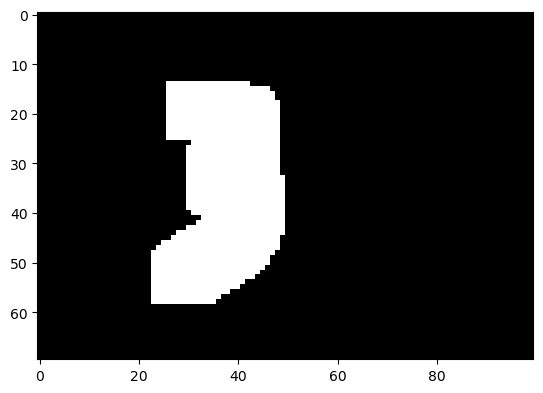

In [7]:
# Crop and test
test_image = binary_image[80:150 , 350:450]
test_image = morphology.dilation(test_image, morphology.square(11))
plt.imshow(test_image, cmap='gray')


test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

key is 0_1, distance is 0.033323651351322855
key is 0_2, distance is 0.030947501451424327
key is 0_3, distance is 0.042755328878788544
key is 1_1, distance is 0.1452039533889769
key is 1_2, distance is 0.13928983882790186
key is 1_3, distance is 0.1295136849873318
key is 2_1, distance is 0.04302201766162281
key is 2_2, distance is 0.0355268943260828
key is 2_3, distance is 0.0347816353970774
key is 3_1, distance is 0.0443007186028963
key is 3_2, distance is 0.033344361646542184
key is 3_3, distance is 0.03592632198009782
key is 4_1, distance is 0.01934598188747413
key is 4_2, distance is 0.019824013898809625
key is 4_3, distance is 0.017231113146509134
key is 5_1, distance is 0.03873967786279851
key is 5_2, distance is 0.050683821141840515
key is 5_3, distance is 0.051998376048406784
key is 6_1, distance is 0.0685051474851279
key is 6_2, distance is 0.06918508024319438
key is 6_3, distance is 0.062125679975955105
key is 7_1, distance is 0.0402435571375535
key is 7_2, distance is 0.0288

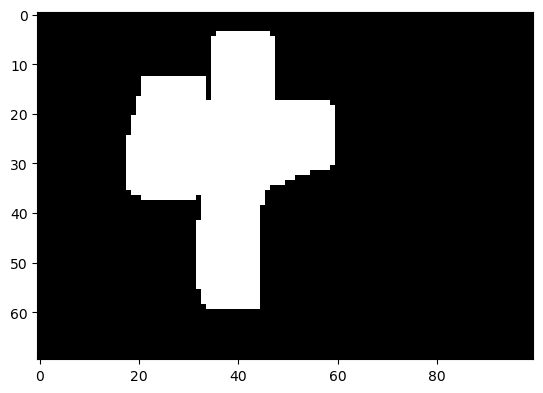

In [8]:
# Crop and test
test_image = binary_image[80:150 , 450:550]
test_image = morphology.dilation(test_image, morphology.square(11))
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

moments = measure.moments_central(test_image)
normalized_moments = measure.moments_normalized(moments)
hu_moments = measure.moments_hu(normalized_moments)

best_match = None
min_distance = float('inf')
print('\nhu moments')
for key, moments in hu.items():
    # moments = np.array(moments)
    distance = np.linalg.norm(hu_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key


print(best_match)

key is 0_1, distance is 0.04007626118411987
key is 0_2, distance is 0.02810003911905868
key is 0_3, distance is 0.05019386254391026
key is 1_1, distance is 0.13001154733726425
key is 1_2, distance is 0.12242250475674457
key is 1_3, distance is 0.11333736644351813
key is 2_1, distance is 0.05269749206953557
key is 2_2, distance is 0.04526302665997983
key is 2_3, distance is 0.04874401279700246
key is 3_1, distance is 0.030224296250988592
key is 3_2, distance is 0.03401423258799216
key is 3_3, distance is 0.03752859549175789
key is 4_1, distance is 0.03788347416599469
key is 4_2, distance is 0.03844459300904827
key is 4_3, distance is 0.036295594644612114
key is 5_1, distance is 0.01615875537753018
key is 5_2, distance is 0.019545829675130764
key is 5_3, distance is 0.035408488646078005
key is 6_1, distance is 0.06116333857319406
key is 6_2, distance is 0.051972847089167155
key is 6_3, distance is 0.06324593765869367
key is 7_1, distance is 0.05827571668100418
key is 7_2, distance is 0.0

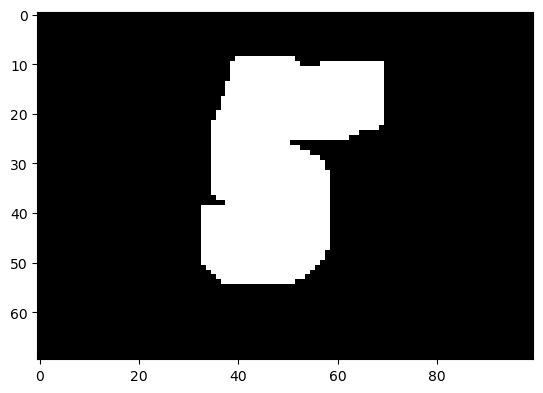

In [9]:
# Crop and test
test_image = binary_image[80:150 , 550:650]
test_image = morphology.dilation(test_image, morphology.square(11))
plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

moments = measure.moments_central(test_image)
normalized_moments = measure.moments_normalized(moments)
hu_moments = measure.moments_hu(normalized_moments)

best_match = None
min_distance = float('inf')
print('\nhu moments')
for key, moments in hu.items():
    # moments = np.array(moments)
    distance = np.linalg.norm(hu_moments - moments)
    print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key


print(best_match)

7_3


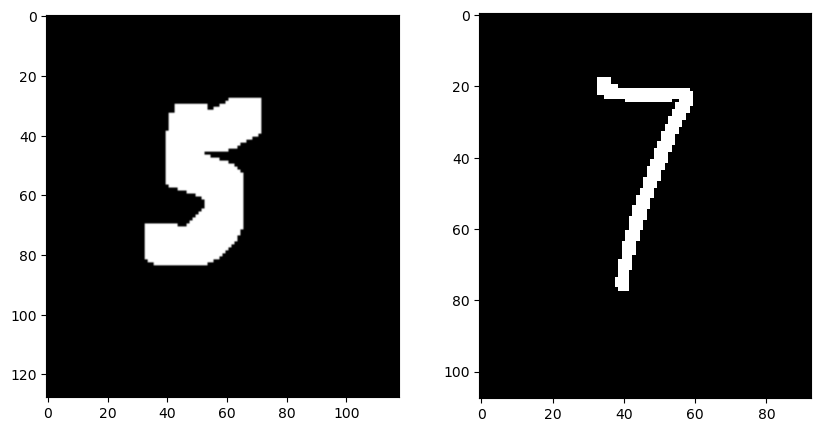

In [10]:
test_image = io.imread('digit_templates/5_1.PNG', as_gray=True)
test_image = test_image < 0.5

h,w = test_image.shape[:2]
h = int(h * 0.8)
# test_image = transform.resize(test_image, (h, w))
# plt.imshow(test_image, cmap='gray')
test_image = morphology.dilation(test_image, morphology.square(11))

# plt.imshow(test_image, cmap='gray')

test_moments = similitudeMoments(test_image)
test_moments = np.array(test_moments)

best_match = None
min_distance = float('inf')

for key, moments in templates.items():
    moments = np.array(moments)
    distance = np.linalg.norm(test_moments - moments)
    # print(f'key is {key}, distance is {distance}')

    if distance < min_distance:
        min_distance = distance
        best_match = key

print(best_match)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(test_image, cmap='gray')
plt.subplot(1,2,2)
match_image = io.imread(f'digit_templates/{best_match}.PNG',as_gray=True)
match_image = match_image < 0.5
match_image = morphology.dilation(match_image, morphology.square(3))
plt.imshow(match_image, cmap='gray')
plt.show()


In [11]:
for key, moments in templates.items():
    print(f'{key}: {moments}')

0_1: [0.1149844004059917, -0.00037205939915578356, -0.011945146702150449, -0.00030157523100965265, 0.05769502408191581, 0.0003064121167310397, -1.2212272297099968e-06]
0_2: [0.12694633538609293, -0.00033518990662429246, -0.018311751328208923, 0.00010645063166633682, 0.05807797874147568, 0.00038879782248414066, -0.0002529756408731451]
0_3: [0.0997609986888979, -0.000889843030610605, -0.01633273819180008, -0.00017037441327317538, 0.06885939470429937, 0.0009026304124980855, -0.00022758828353826394]
1_1: [0.2670236185112802, -0.004626163266635312, -0.023441809951570004, -0.0008426295405671578, 0.027170947251079484, 0.0005983842555098525, -0.00011018211296903026]
1_2: [0.26112999410557314, 0.0036879536379355615, -0.0334593290795934, 0.00027411546407111667, 0.029995483643926873, -0.0006700872787211138, 0.0002116667536773605]
1_3: [0.2512119297770393, 0.001065812131901063, -0.028218782416158765, 7.431191241601327e-05, 0.030073026647247418, -0.0001343583493220814, 4.197808188689457e-05]
2_1: [

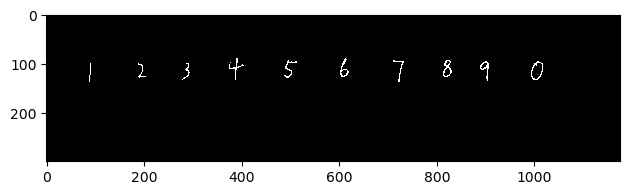

[((119, 90), (97, 85, 142, 96)), ((-1, -1), None), ((-1, -1), None), ((-1, -1), None), ((117, 195), (98, 185, 133, 208)), ((-1, -1), None), ((-1, -1), None), ((115, 287), (96, 275, 137, 298)), ((-1, -1), None), ((-1, -1), None), ((109, 388), (86, 370, 138, 408)), ((-1, -1), None), ((-1, -1), None), ((-1, -1), None), ((110, 499), (91, 485, 133, 518)), ((-1, -1), None), ((-1, -1), None), ((-1, -1), None), ((112, 610), (87, 599, 132, 623)), ((-1, -1), None), ((-1, -1), None), ((-1, -1), None), ((110, 724), (90, 707, 141, 736)), ((-1, -1), None), ((-1, -1), None), ((111, 822), (90, 810, 132, 834)), ((-1, -1), None), ((-1, -1), None), ((112, 900), (93, 886, 139, 911)), ((-1, -1), None), ((-1, -1), None), ((-1, -1), None), ((115, 1006), (93, 991, 138, 1022))]


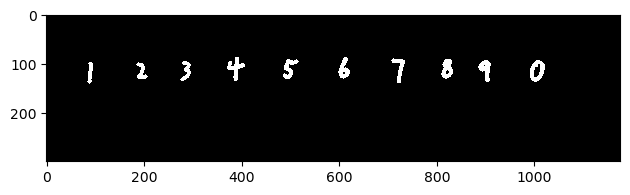

In [12]:
image = io.imread('image/test1.jpg')

gray_image = color.rgb2gray(image)

# gray_image = filters.gaussian(gray_image, sigma=1)

thresh = 0.2
binary_image = gray_image < thresh
# binary_image = gray_image < filters.threshold_otsu(gray_image)
test_image = binary_image[0:300, 100:]
io.imshow(test_image,cmap='gray')
io.show()

centroids = find_shapes(test_image)
print(centroids)

<class 'int'>


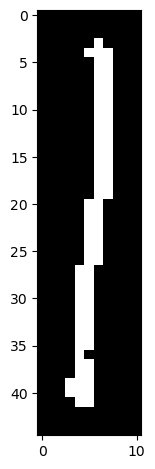

key is 0_1, distance is 0.23392507222263184, min distance is inf
key is 0_2, distance is 0.22261148469911737, min distance is 0.23392507222263184
key is 0_3, distance is 0.25109803738102804, min distance is 0.22261148469911737
key is 1_1, distance is 0.08200307686370681, min distance is 0.22261148469911737
key is 1_2, distance is 0.09131166448331993, min distance is 0.08200307686370681
key is 1_3, distance is 0.09883143456747447, min distance is 0.08200307686370681
key is 2_1, distance is 0.2372320338943044, min distance is 0.08200307686370681
key is 2_2, distance is 0.2055210632985457, min distance is 0.08200307686370681
key is 2_3, distance is 0.23676348834296987, min distance is 0.08200307686370681
key is 3_1, distance is 0.20776528527778965, min distance is 0.08200307686370681
key is 3_2, distance is 0.2189326799478926, min distance is 0.08200307686370681
key is 3_3, distance is 0.22558889787702308, min distance is 0.08200307686370681
key is 4_1, distance is 0.232353200197473, min 

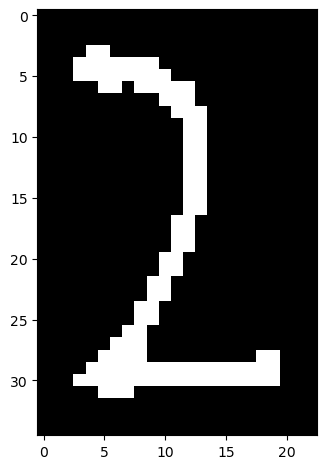

key is 0_1, distance is 0.056805108613584225, min distance is inf
key is 0_2, distance is 0.050565749174268655, min distance is 0.056805108613584225
key is 0_3, distance is 0.07390402948764181, min distance is 0.050565749174268655
key is 1_1, distance is 0.11177591140126802, min distance is 0.050565749174268655
key is 1_2, distance is 0.1104213468142675, min distance is 0.050565749174268655
key is 1_3, distance is 0.09919351557142192, min distance is 0.050565749174268655
key is 2_1, distance is 0.05739888016214822, min distance is 0.050565749174268655
key is 2_2, distance is 0.024884570305068212, min distance is 0.050565749174268655
key is 2_3, distance is 0.05543827635141075, min distance is 0.024884570305068212
key is 3_1, distance is 0.04393479212684293, min distance is 0.024884570305068212
key is 3_2, distance is 0.042995842732655505, min distance is 0.024884570305068212
key is 3_3, distance is 0.04918842649369329, min distance is 0.024884570305068212
key is 4_1, distance is 0.0581

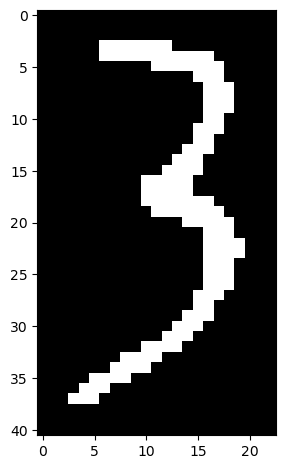

key is 0_1, distance is 0.06771142280326992, min distance is inf
key is 0_2, distance is 0.05669554255078532, min distance is 0.06771142280326992
key is 0_3, distance is 0.08520934998237602, min distance is 0.05669554255078532
key is 1_1, distance is 0.08915293530294469, min distance is 0.05669554255078532
key is 1_2, distance is 0.08500693039090605, min distance is 0.05669554255078532
key is 1_3, distance is 0.07424868983827618, min distance is 0.05669554255078532
key is 2_1, distance is 0.0746803905988492, min distance is 0.05669554255078532
key is 2_2, distance is 0.04449220149798886, min distance is 0.05669554255078532
key is 2_3, distance is 0.07181013927934594, min distance is 0.04449220149798886
key is 3_1, distance is 0.045170196325756216, min distance is 0.04449220149798886
key is 3_2, distance is 0.05316527548049124, min distance is 0.04449220149798886
key is 3_3, distance is 0.06039287197520304, min distance is 0.04449220149798886
key is 4_1, distance is 0.0684343227287446, 

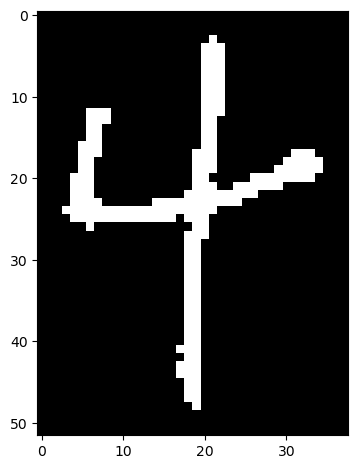

key is 0_1, distance is 0.031269719797248755, min distance is inf
key is 0_2, distance is 0.03005581388561374, min distance is 0.031269719797248755
key is 0_3, distance is 0.041445544266332394, min distance is 0.03005581388561374
key is 1_1, distance is 0.1464299986928547, min distance is 0.03005581388561374
key is 1_2, distance is 0.14071777852242753, min distance is 0.03005581388561374
key is 1_3, distance is 0.13080059058955212, min distance is 0.03005581388561374
key is 2_1, distance is 0.04215137575392491, min distance is 0.03005581388561374
key is 2_2, distance is 0.03483718692603669, min distance is 0.03005581388561374
key is 2_3, distance is 0.03271952211024518, min distance is 0.03005581388561374
key is 3_1, distance is 0.04481648318469979, min distance is 0.03005581388561374
key is 3_2, distance is 0.032262968159912433, min distance is 0.03005581388561374
key is 3_3, distance is 0.03506798869922986, min distance is 0.03005581388561374
key is 4_1, distance is 0.018128359024084

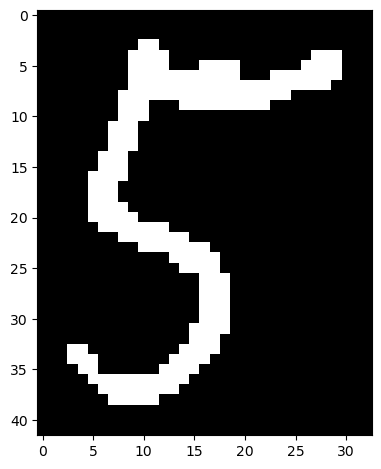

key is 0_1, distance is 0.03238415015333307, min distance is inf
key is 0_2, distance is 0.02058514941527114, min distance is 0.03238415015333307
key is 0_3, distance is 0.04401664778434362, min distance is 0.02058514941527114
key is 1_1, distance is 0.13299968615315683, min distance is 0.02058514941527114
key is 1_2, distance is 0.12600102199475408, min distance is 0.02058514941527114
key is 1_3, distance is 0.11650965476847333, min distance is 0.02058514941527114
key is 2_1, distance is 0.04661476447277231, min distance is 0.02058514941527114
key is 2_2, distance is 0.03936103554490535, min distance is 0.02058514941527114
key is 2_3, distance is 0.04119199529738226, min distance is 0.02058514941527114
key is 3_1, distance is 0.027823959901150164, min distance is 0.02058514941527114
key is 3_2, distance is 0.02700586786105377, min distance is 0.02058514941527114
key is 3_3, distance is 0.031104188558447605, min distance is 0.02058514941527114
key is 4_1, distance is 0.0301440058862382

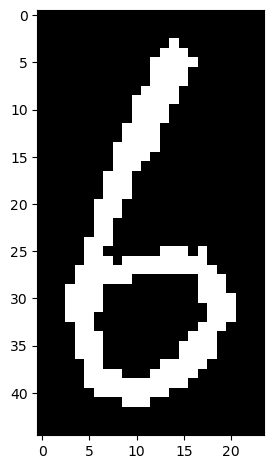

key is 0_1, distance is 0.057588871531039434, min distance is inf
key is 0_2, distance is 0.04804851397247655, min distance is 0.057588871531039434
key is 0_3, distance is 0.07549629384179476, min distance is 0.04804851397247655
key is 1_1, distance is 0.10167092981348545, min distance is 0.04804851397247655
key is 1_2, distance is 0.09898127375395493, min distance is 0.04804851397247655
key is 1_3, distance is 0.08780994193687763, min distance is 0.04804851397247655
key is 2_1, distance is 0.06352590211809576, min distance is 0.04804851397247655
key is 2_2, distance is 0.03526603829457244, min distance is 0.04804851397247655
key is 2_3, distance is 0.06083153305276994, min distance is 0.03526603829457244
key is 3_1, distance is 0.03843217725888544, min distance is 0.03526603829457244
key is 3_2, distance is 0.04292777906298932, min distance is 0.03526603829457244
key is 3_3, distance is 0.050207685848216, min distance is 0.03526603829457244
key is 4_1, distance is 0.0611194602060419, 

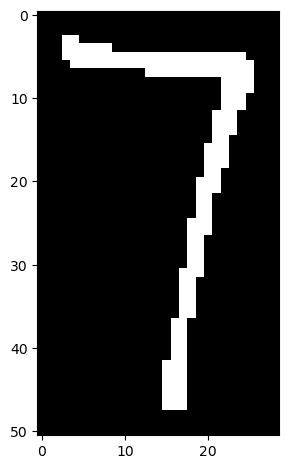

key is 0_1, distance is 0.15029242918527635, min distance is inf
key is 0_2, distance is 0.14072002476424272, min distance is 0.15029242918527635
key is 0_3, distance is 0.16639010536851354, min distance is 0.14072002476424272
key is 1_1, distance is 0.07115318573417478, min distance is 0.14072002476424272
key is 1_2, distance is 0.06997009844514031, min distance is 0.07115318573417478
key is 1_3, distance is 0.06788682299398426, min distance is 0.06997009844514031
key is 2_1, distance is 0.15603445941742494, min distance is 0.06788682299398426
key is 2_2, distance is 0.12388694419193626, min distance is 0.06788682299398426
key is 2_3, distance is 0.15252939756200348, min distance is 0.06788682299398426
key is 3_1, distance is 0.1323467325799877, min distance is 0.06788682299398426
key is 3_2, distance is 0.13831773221787147, min distance is 0.06788682299398426
key is 3_3, distance is 0.14508718367608825, min distance is 0.06788682299398426
key is 4_1, distance is 0.1440549275109818, m

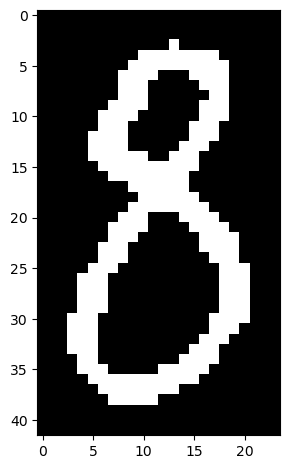

key is 0_1, distance is 0.03189998716651757, min distance is inf
key is 0_2, distance is 0.024476282878556663, min distance is 0.03189998716651757
key is 0_3, distance is 0.050819186000606996, min distance is 0.024476282878556663
key is 1_1, distance is 0.12585259412390548, min distance is 0.024476282878556663
key is 1_2, distance is 0.12163337850470714, min distance is 0.024476282878556663
key is 1_3, distance is 0.1108292145641721, min distance is 0.024476282878556663
key is 2_1, distance is 0.04386264385686591, min distance is 0.024476282878556663
key is 2_2, distance is 0.021957440076750476, min distance is 0.024476282878556663
key is 2_3, distance is 0.03649438119753145, min distance is 0.021957440076750476
key is 3_1, distance is 0.02878050637377683, min distance is 0.021957440076750476
key is 3_2, distance is 0.02065019061854603, min distance is 0.021957440076750476
key is 3_3, distance is 0.029150462774942872, min distance is 0.02065019061854603
key is 4_1, distance is 0.035744

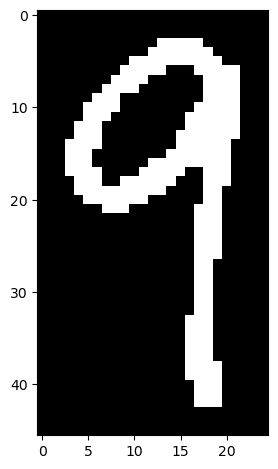

key is 0_1, distance is 0.07080458594599066, min distance is inf
key is 0_2, distance is 0.06596109220426657, min distance is 0.07080458594599066
key is 0_3, distance is 0.08700505948637147, min distance is 0.06596109220426657
key is 1_1, distance is 0.11475559668182639, min distance is 0.06596109220426657
key is 1_2, distance is 0.11221339366604344, min distance is 0.06596109220426657
key is 1_3, distance is 0.10198562516495417, min distance is 0.06596109220426657
key is 2_1, distance is 0.07738639198937475, min distance is 0.06596109220426657
key is 2_2, distance is 0.048008626476952684, min distance is 0.06596109220426657
key is 2_3, distance is 0.07066734507179288, min distance is 0.048008626476952684
key is 3_1, distance is 0.06783698793771593, min distance is 0.048008626476952684
key is 3_2, distance is 0.06257418914808158, min distance is 0.048008626476952684
key is 3_3, distance is 0.06924258988059906, min distance is 0.048008626476952684
key is 4_1, distance is 0.0647987783973

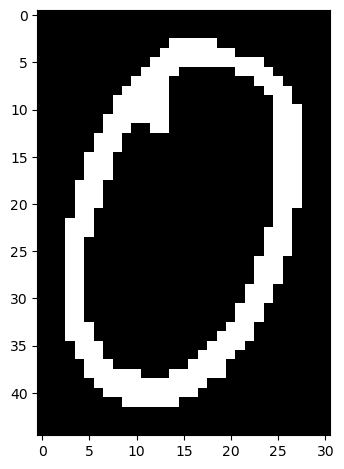

key is 0_1, distance is 0.01646361921255186, min distance is inf
key is 0_2, distance is 0.009507830840750181, min distance is 0.01646361921255186
key is 0_3, distance is 0.03229288535408993, min distance is 0.009507830840750181
key is 1_1, distance is 0.14133938539070778, min distance is 0.009507830840750181
key is 1_2, distance is 0.13620757158485738, min distance is 0.009507830840750181
key is 1_3, distance is 0.125854741545823, min distance is 0.009507830840750181
key is 2_1, distance is 0.02826135982613144, min distance is 0.009507830840750181
key is 2_2, distance is 0.023769001594383582, min distance is 0.009507830840750181
key is 2_3, distance is 0.02105843101392648, min distance is 0.009507830840750181
key is 3_1, distance is 0.02451786204042851, min distance is 0.009507830840750181
key is 3_2, distance is 0.008820992512364326, min distance is 0.009507830840750181
key is 3_3, distance is 0.01351442882994563, min distance is 0.008820992512364326
key is 4_1, distance is 0.0180694

In [13]:
test = centroids[1][0]

print(type(test[0]))
for shape in centroids:
    if shape[1] is not None:
        index = shape[1]
        img = test_image[index[0]:index[2],index[1]:index[3]]
        
        io.imshow(img,cmap='gray')
        io.show()
        img = morphology.dilation(img, morphology.square(11))
        
        test_moments = similitudeMoments(img)
        test_moments = np.array(test_moments)

        best_match = None
        min_distance = float('inf')

        for key, moments in templates.items():
            moments = np.array(moments)
            distance = np.linalg.norm(test_moments - moments)
            print(f'key is {key}, distance is {distance}, min distance is {min_distance}')

            if distance < min_distance:
                min_distance = distance
                best_match = key
        print(best_match)

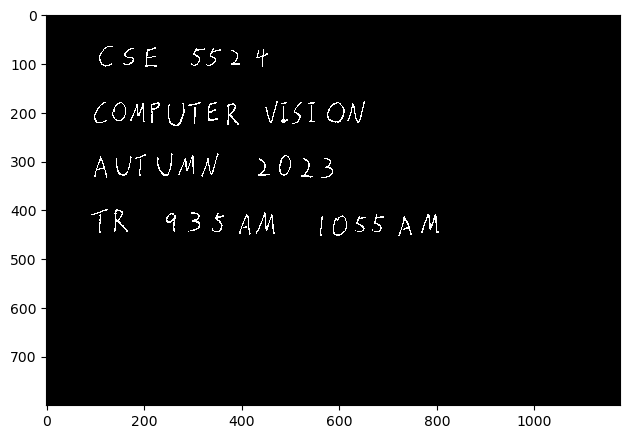

[((205, 110), (177, 95, 227, 130)), ((87, 120), (62, 105, 111, 141)), ((200, 150), (178, 133, 222, 167)), ((88, 169), (66, 155, 108, 184)), ((201, 190), (179, 169, 224, 205)), ((89, 213), (64, 200, 112, 230)), ((197, 221), (178, 212, 226, 236)), ((207, 266), (179, 246, 233, 287)), ((197, 304), (176, 288, 228, 320)), ((86, 310), (67, 294, 109, 329)), ((201, 339), (177, 328, 222, 356)), ((87, 342), (67, 325, 109, 362)), ((205, 380), (180, 368, 231, 399)), ((91, 388), (70, 377, 108, 401)), ((86, 441), (68, 428, 111, 457)), ((202, 462), (175, 446, 227, 478)), ((202, 487), (177, 479, 226, 499)), ((204, 515), (178, 502, 229, 527)), ((201, 544), (177, 534, 225, 555)), ((202, 593), (178, 572, 225, 615)), ((201, 635), (176, 614, 225, 657)), ((-2, -2), None), ((418, 110), (396, 89, 452, 130)), ((315, 112), (288, 95, 338, 129)), ((423, 149), (397, 136, 451, 171)), ((309, 173), (284, 140, 335, 207)), ((-1, -1), None), ((310, 244), (282, 224, 335, 263)), ((423, 257), (404, 242, 449, 269)), ((310, 2

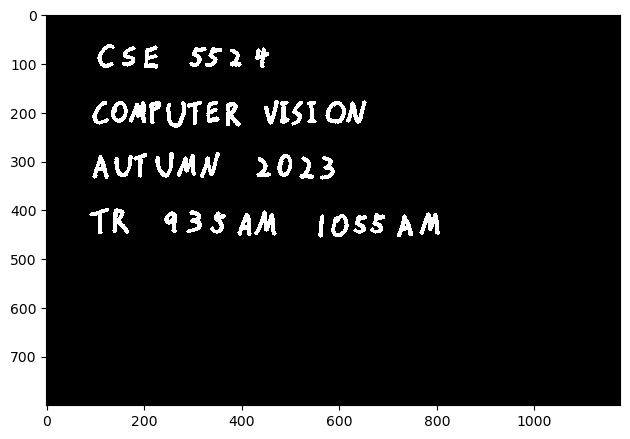

In [14]:
image = io.imread('image/test6.jpg')

gray_image = color.rgb2gray(image)

# gray_image = filters.gaussian(gray_image, sigma=1)

thresh = 0.2
binary_image = gray_image < thresh

test_image = binary_image[0:800, 100:]
io.imshow(test_image,cmap='gray')
io.show()

centroids = find_shapes(test_image)
print(centroids)

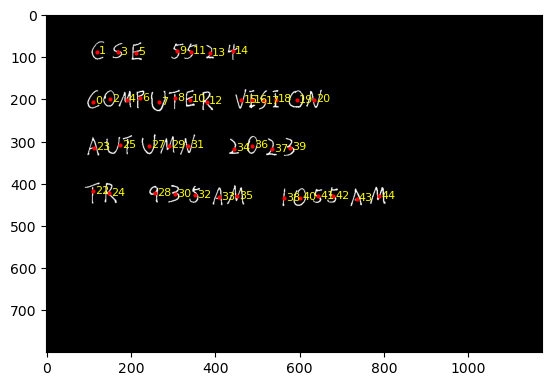

In [15]:
show_centroid(test_image, centroids)

In [16]:
# Calculate and store 7 similitude moments of template images to a dictionary
all_templates = {}

for file in os.listdir('digit_templates/'):
    filepath = os.path.join('digit_templates/', file)
    image = io.imread(filepath, as_gray=True)
    image = image < 0.5
    image = morphology.dilation(image, morphology.square(19))
    seven_moments = similitudeMoments(image)
    filename = file.split('.PNG')[0]
    all_templates[filename] = seven_moments

for file in os.listdir('letter_templates/'):
    filepath = os.path.join('letter_templates/', file)
    image = io.imread(filepath, as_gray=True)
    image = image < 0.5
    image = morphology.dilation(image, morphology.square(19))
    seven_moments = similitudeMoments(image)
    filename = file.split('.PNG')[0]
    all_templates[filename] = seven_moments


In [17]:
for shape in centroids:
    if shape[1] is not None:
        index = shape[1]
        img = test_image[index[0]:index[2],index[1]:index[3]]
        
        # io.imshow(img,cmap='gray')
        # io.show()
        img = morphology.dilation(img, morphology.square(11))
        
        test_moments = similitudeMoments(img)
        test_moments = np.array(test_moments)

        best_match = None
        min_distance = float('inf')

        for key, moments in all_templates.items():
            moments = np.array(moments)
            distance = np.linalg.norm(test_moments - moments)
            print(f'key is {key}, distance is {distance}, min distance is {min_distance}')

            if distance < min_distance:
                min_distance = distance
                best_match = key
        print(best_match)

key is 0_1, distance is 0.08473700882247436, min distance is inf
key is 0_2, distance is 0.07348521745114538, min distance is 0.08473700882247436
key is 0_3, distance is 0.09779440779395271, min distance is 0.07348521745114538
key is 1_1, distance is 0.08936238955673982, min distance is 0.07348521745114538
key is 1_2, distance is 0.08607580725659322, min distance is 0.07348521745114538
key is 1_3, distance is 0.07695205529876153, min distance is 0.07348521745114538
key is 2_1, distance is 0.08363934367765877, min distance is 0.07348521745114538
key is 2_2, distance is 0.05979761670149376, min distance is 0.07348521745114538
key is 2_3, distance is 0.08605885976898978, min distance is 0.05979761670149376
key is 3_1, distance is 0.058868416267337145, min distance is 0.05979761670149376
key is 3_2, distance is 0.06992406755612274, min distance is 0.058868416267337145
key is 3_3, distance is 0.0743714426531694, min distance is 0.058868416267337145
key is 4_1, distance is 0.0818127607360109